# Unsupervised learning - more algorithms
We will use another two clustering algorithms - DBSCAN and Hierarchical clustering. The base principles and important hyper-parameters will be explained.

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

## Lets take a look on our data files

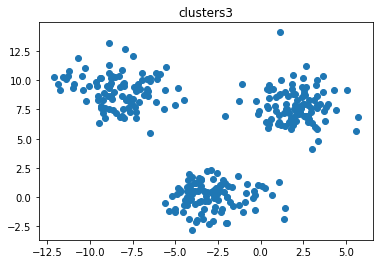

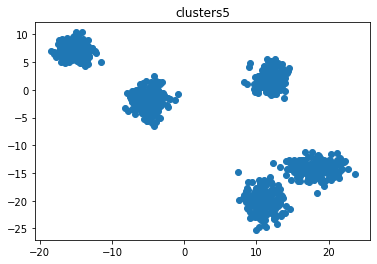

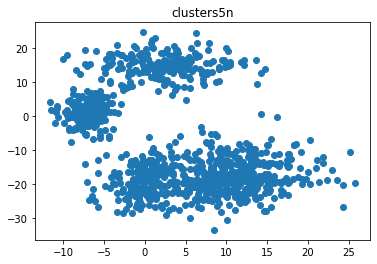

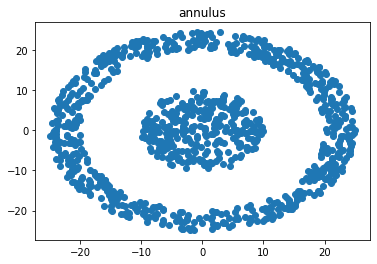

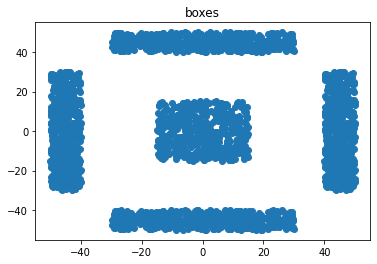

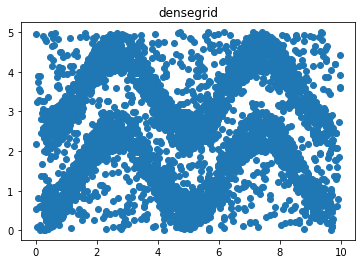

In [2]:
datasets = dict()
for data_file in ['clusters3', 'clusters5', 'clusters5n', 'annulus', 'boxes', 'densegrid']:
    data = np.loadtxt(f'{data_file}.csv', delimiter=';')
    datasets[data_file] = data
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(data_file)

## Agglomerative clustering
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Take a look at https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering

Agglomerative clustering is a bottom-up approach to clustering. We first divide each instance into its own cluster and merge them into couples based on a similarity metric.

Subsequently we compute the similarity again and merge the couples into bigger groups (clusters).

These groups are then merged into the bigger ones till there is only a one big group containing all the instances present at the top.

We don't have to know the number of clusters beforehand, we can perform the whole clustering process and select the appropriate number of clusters afterward based on the obtained results. We usually use the dendrogram for the distance threshold estimation.

You may ask how is the similarity among groups computed. There are various ways how we can compute the value.

### Linkage variants
- **Maximum or complete linkage**: The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce more compact clusters.


- **Minimum or single linkage**: The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce long, “loose” clusters.


- **Mean or average linkage**: The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.

- **Ward’s minimum variance method**: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged. A cloud more dense and more concentric towards its middle, whereas marginal points are few and could be scattered relatively freely emerges using this type of linkage.


#### We are going to take a look at dendrogram, but we will be using only smaller portion of data

In [3]:
data = datasets['clusters3']
sel = np.random.choice(data.shape[0], size=30, replace=False)
data_subset = data[sel, :]
data_subset.shape

(30, 2)

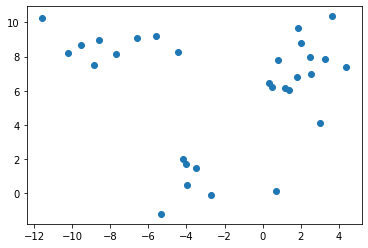

In [4]:
plt.scatter(data_subset[:, 0], data_subset[:, 1])

In [5]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

### Complete linkage

#### We need to calculate whole hiearchical clustering tree before dendrogram calculation

- We can achieve this by setting distance_threshold=0, n_clusters=None in sklearn.cluster.AgglomerativeClustering

- Notice the height of the vertcal lines in the denrogram - the higher the line (called fusion), the lower is the similarity between the clusters, this similarity is called cophenetic distance.

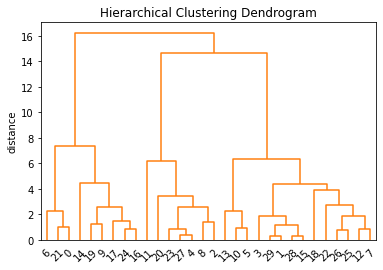

In [6]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

#### What can be ideal level for splitting our data to cluster?

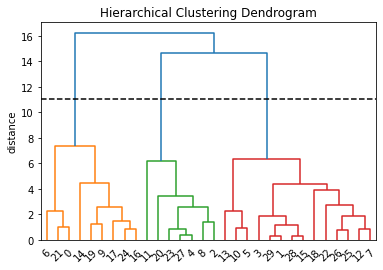

In [7]:
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=11)
plt.axhline(y=11, color='black', linestyle='--')

## Generate dendrogram for the full dataset

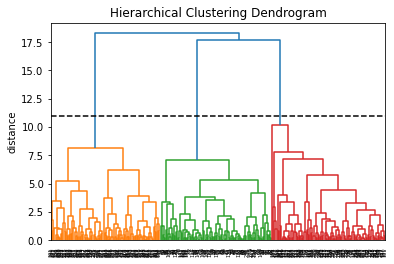

In [8]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=11)
plt.axhline(y=11, color='black', linestyle='--')

#### Lets generate clustering results and use sccater plot for visualizion for our 2D toy datasets

We can use one of following parameters to obtain our clusters from AgglomerativeClustering:
- **distance_thrashold** - this is effectively the split line above, i.e. if the distance between two clusters is higher than the *distance_thrashold*, then these clusters won't be merged
- **n_clusters** - similar to the k-means *k* parameter

In [9]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=11, n_clusters=None)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    102
2    100
1     98
dtype: int64

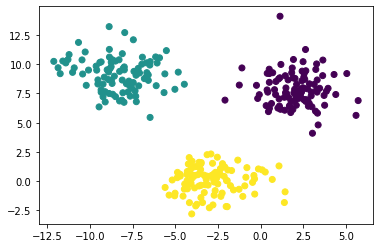

In [10]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

## We can specify number of clusters directly

In [11]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    102
2    100
1     98
dtype: int64

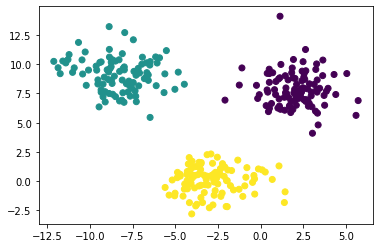

In [12]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

### Single linkage

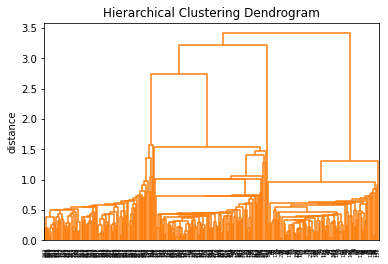

In [13]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [14]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=2, n_clusters=None)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

1    101
3    100
0     98
2      1
dtype: int64

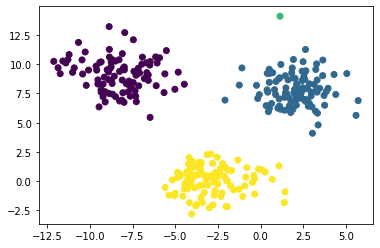

In [15]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

## Use Agglomerative clustering for annulus data

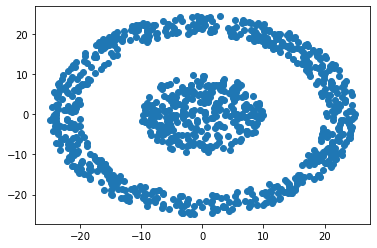

In [16]:
data = datasets['annulus']
plt.scatter(data[:,0], data[:,1])

### Complete linkage

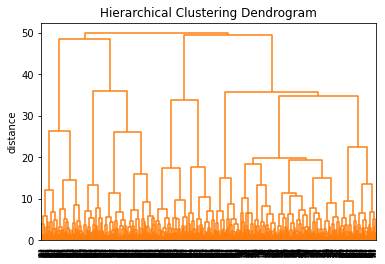

In [17]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [18]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=4)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

1    477
0    219
2    179
3    125
dtype: int64

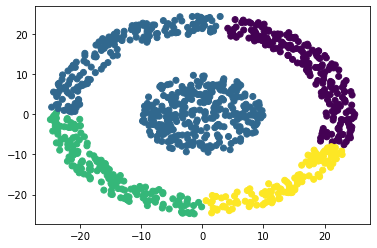

In [19]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

### Single linkage

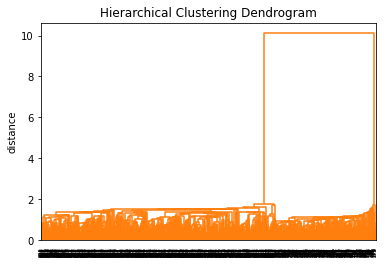

In [20]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [21]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=2)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    700
1    300
dtype: int64

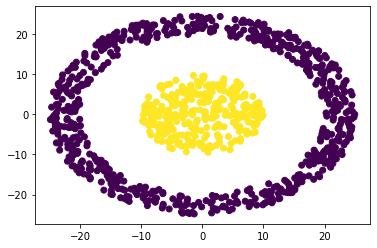

In [22]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

### Note: We have seen, that there is no clear winner among linkage parameters - it depends solely on the dataset (No Free Lunch Theorem)

#### For more clustering informations you can take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering

# Task (2p)
- Use **Agglomerative Clustering** on **clusters5** and **densegrid** datasets
- Detect "ideal" number of clusters using the dendrogram
- Explore detected clusters and **describe** them to the Markdown cell (use Box plots, compare median, std. dev, outliers, etc.)
- Use both, the single and complete linkage and compare the results of the clustering methods
    - How are the selected clusters aligned with the raw data (use scatter plots)?
    - i.e. You can guess the right number of clusters by taking a look at the data, is the result right from your point of view?

# Complete clusters5

In [23]:
data = datasets['clusters5']
sel = np.random.choice(data.shape[0], size=30, replace=False)
data_subset = data[sel, :]
data_subset.shape

(30, 2)

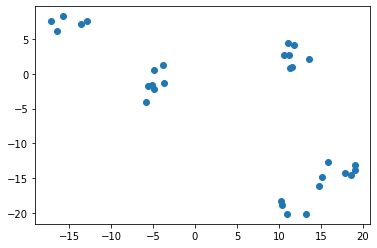

In [24]:
plt.scatter(data_subset[:, 0], data_subset[:, 1])

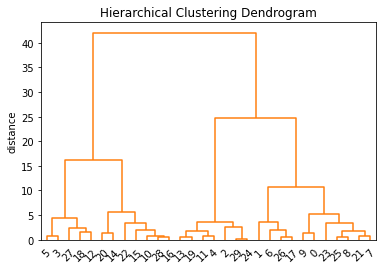

In [25]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

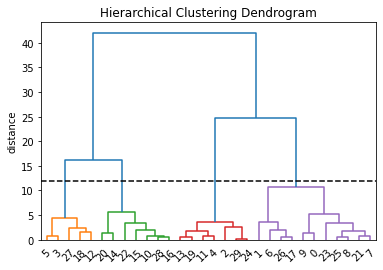

In [26]:
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=12)
plt.axhline(y=12, color='black', linestyle='--')

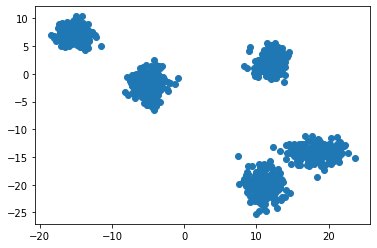

In [27]:
data = datasets['clusters5']
plt.scatter(data[:,0], data[:,1])

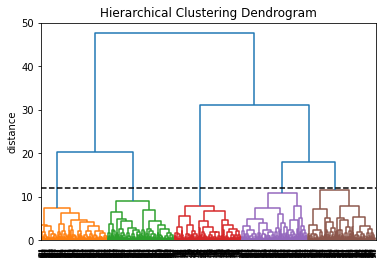

In [28]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=12)
plt.axhline(y=12, color='black', linestyle='--')

In [29]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=5)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    201
3    200
4    200
2    200
1    199
dtype: int64

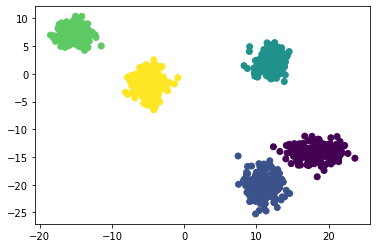

In [30]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Pouhým okem můžeme odhadnout, že tam bude 5 clusteru což se taky stalo

# SINGLE linkage clusters5

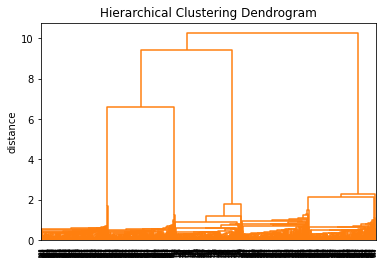

In [31]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

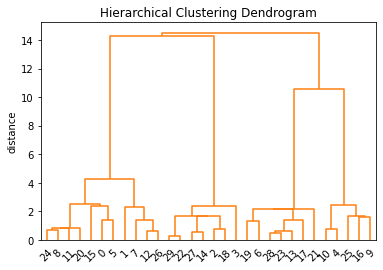

In [32]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [33]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=4)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    400
1    200
3    200
2    200
dtype: int64

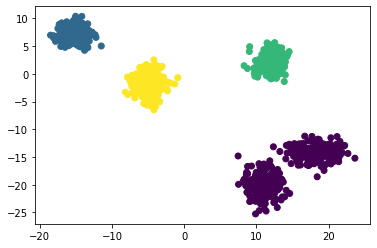

In [34]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

U single linkage je o jeden cluster více(zelený) ve, kterém je jenom jeden záznam

# Complete densegrid

In [35]:
data = datasets['densegrid']
sel = np.random.choice(data.shape[0], size=30, replace=False)
data_subset = data[sel, :]
data_subset.shape

(30, 2)

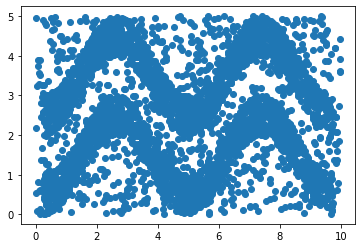

In [36]:
plt.scatter(data[:,0], data[:,1])

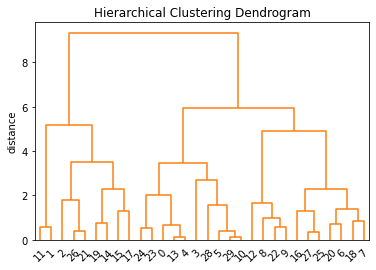

In [37]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

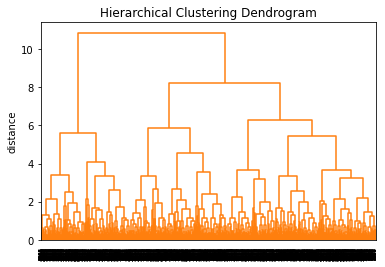

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    1766
2    1161
1    1073
dtype: int64

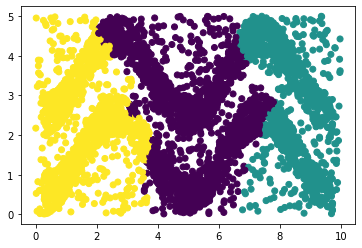

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Vidíme, že v tomhle případě určení clusterů nefunguje a rozdělí celý graf na třetiny.

# SINGLE linkage densegrid

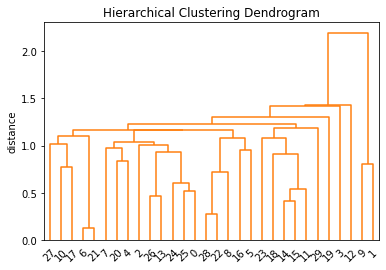

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

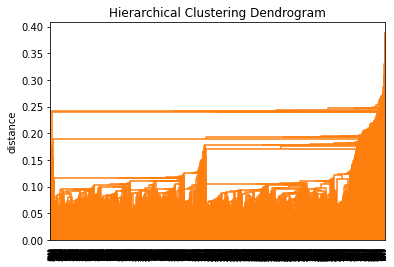

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=12, n_clusters=None)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    4000
dtype: int64

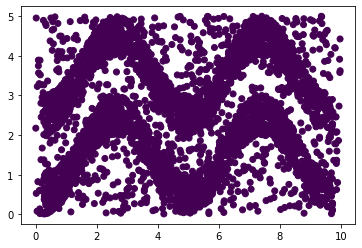

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Single linkage nám nerozdělí graf na clustery vůbec

# Complete boxes

In [ ]:
data = datasets['boxes']
sel = np.random.choice(data.shape[0], size=30, replace=False)
data_subset = data[sel, :]
data_subset.shape

(30, 2)

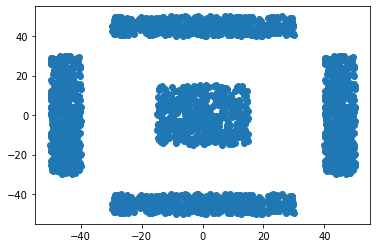

In [ ]:
plt.scatter(data[:,0], data[:,1])

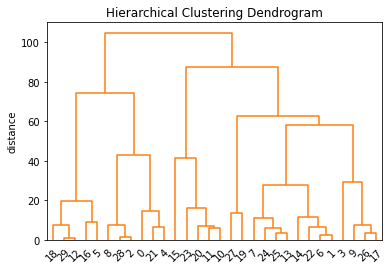

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

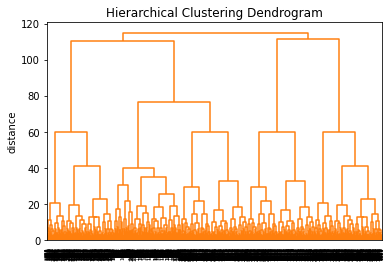

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=5)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

2    500
3    500
1    500
0    500
4    500
dtype: int64

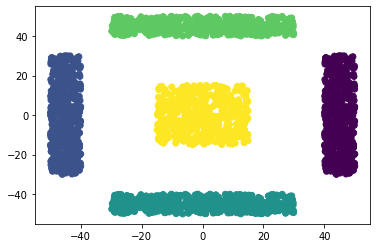

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

Rozděleno na 5 clusteru jak je i pouhým okem vidět

# SINGLE linkage boxes

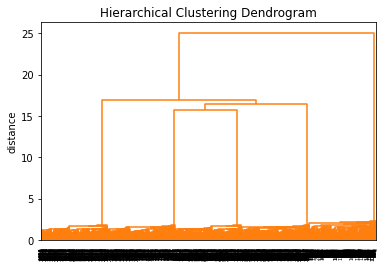

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=10, n_clusters=None)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

2    500
3    500
1    500
4    500
0    500
dtype: int64

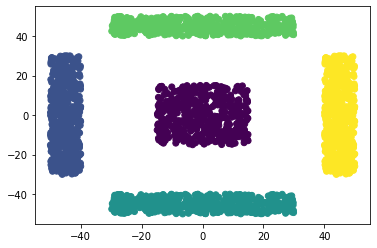

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

# COMPLETE cluster5n

In [38]:
data = datasets['clusters5n']
sel = np.random.choice(data.shape[0], size=30, replace=False)
data_subset = data[sel, :]
data_subset.shape

(30, 2)

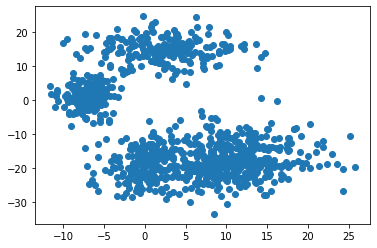

In [39]:
plt.scatter(data[:,0], data[:,1])

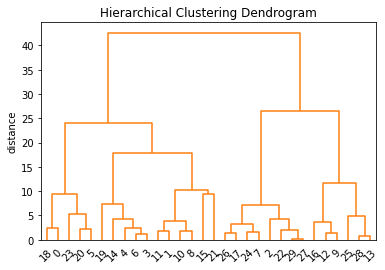

In [40]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

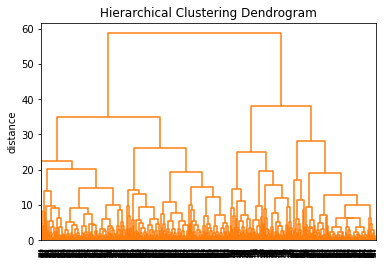

In [41]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [42]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=4)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

1    310
3    257
0    244
2    189
dtype: int64

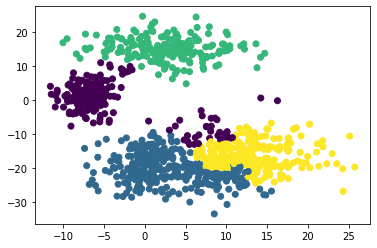

In [43]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

# SINGLE linkage

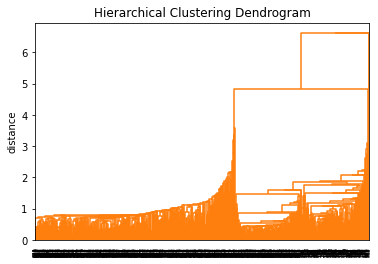

In [44]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [45]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=2)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    999
1      1
dtype: int64

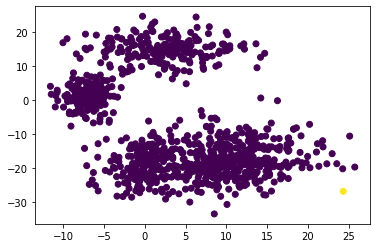

In [46]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)